In [1]:
from gensim.models import KeyedVectors

# 读取词向量文件
path = 'output\quantangshi_emb.txt'
emb = KeyedVectors.load_word2vec_format(path, binary=False, unicode_errors='ignore')
print(emb)

KeyedVectors<vector_size=100, 5504 keys>


# 生成圖譜

In [1]:
from gensim.models import KeyedVectors
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

two_letter_words = [word for word in emb.index_to_key if len(word) == 2]
print(two_letter_words)

similarity_matrix = np.zeros((len(two_letter_words), len(two_letter_words)))

for i, word1 in enumerate(two_letter_words):
    for j, word2 in enumerate(two_letter_words):
        if i <= j:  # 因为余弦相似度矩阵是对称的，所以只需计算上三角部分
            similarity = cosine_similarity([emb[word1]], [emb[word2]])[0][0]
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity  # 对称位置也设置为相似度值


NameError: name 'emb' is not defined

In [3]:
print(similarity_matrix)

[[ 0.99999994  0.36581203  0.42903933 ...  0.11059996 -0.01559079
   0.22724324]
 [ 0.36581203  0.99999994  0.47561562 ...  0.2830258   0.13205713
   0.07685231]
 [ 0.42903933  0.47561562  0.99999994 ...  0.34142089  0.00288165
   0.00154526]
 ...
 [ 0.11059996  0.2830258   0.34142089 ...  1.00000012  0.32327077
  -0.07128906]
 [-0.01559079  0.13205713  0.00288165 ...  0.32327077  1.
   0.17016521]
 [ 0.22724324  0.07685231  0.00154526 ... -0.07128906  0.17016521
   0.99999994]]


In [4]:
import numpy as np

# 假设 similarity_matrix 是你的余弦相似度矩阵
# 如果矩阵太大，你可以只计算一个子集的统计量

min_value = np.min(similarity_matrix)
max_value = np.max(similarity_matrix)
mean_value = np.mean(similarity_matrix)
std_value = np.std(similarity_matrix)

print("最小值:", min_value)
print("最大值:", max_value)
print("平均值:", mean_value)
print("标准差:", std_value)


最小值: -0.24123026430606842
最大值: 1.000000238418579
平均值: 0.18897925070176588
标准差: 0.13666475186363927


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 設置本地字體文件路徑
font_path = r'C:\Windows\Fonts\simkai.ttf'

# 使用FontProperties類來設置字體
custom_font = mpl.font_manager.FontProperties(fname=font_path)

# 設置Matplotlib的rcParams
plt.rcParams['font.sans-serif'] = custom_font.get_name()
mpl.rcParams['font.sans-serif'] = custom_font.get_name()


C:\Users\xiangpu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


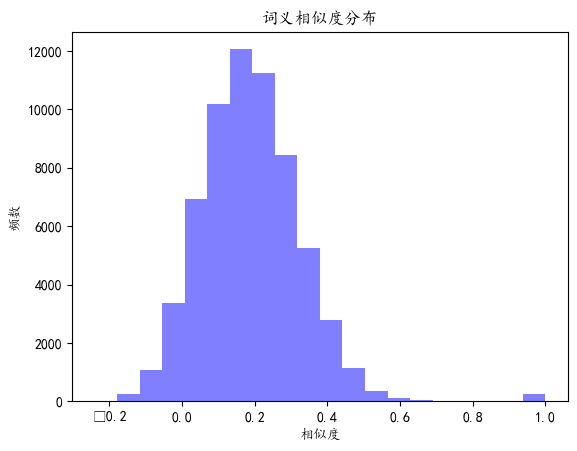

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 假设你有一个存储矩阵数值的numpy数组
matrix_values = []
for i in similarity_matrix:
    for j in i:
        matrix_values.append(j)
# 绘制直方图
plt.hist(matrix_values, bins=20, color='blue', alpha=0.5)  # alpha参数控制透明度
plt.xlabel('相似度')
plt.ylabel('频数')
plt.title('词义相似度分布')
plt.show()


In [32]:
import numpy as np
import pandas as pd

threshold = 0.5  # 相似度阈值，大于该值的才添加为边

# 获取满足条件的边及相似度
edges = []
for i in range(len(similarity_matrix)):
    for j in range(i + 1, len(similarity_matrix)):
        similarity = similarity_matrix[i][j]
        if similarity > threshold:
            edges.append((two_letter_words[i], two_letter_words[j], similarity))

# 创建 DataFrame 存储边和相似度
df = pd.DataFrame(edges, columns=["Source", "Target", "Similarity"])

# 将 DataFrame 导出为 CSV 文件
csv_filename = "output/gephi_data0.5.csv"
df.to_csv(csv_filename, index=False)

print("CSV 文件导出成功:", csv_filename)


CSV 文件导出成功: output/gephi_data0.5.csv


In [5]:
# import numpy as np
# from gensim.models import KeyedVectors
## 生成鄰接矩陣
# # Load word vectors
# path ='output\quantangshi_emb.txt'
# emb = KeyedVectors.load_word2vec_format(path, binary=False, unicode_errors='ignore')

# # Get the list of words
# words = emb.index_to_key

# # Calculate similarity (using cosine similarity as an example)
# def cosine_similarity(word1, word2):
#     vec1 = emb.get_vector(word1)
#     vec2 = emb.get_vector(word2)
#     dot_product = np.dot(vec1, vec2)
#     norm1 = np.linalg.norm(vec1)
#     norm2 = np.linalg.norm(vec2)
#     similarity = dot_product / (norm1 * norm2)
#     return similarity

# # Build the adjacency matrix
# num_words = len(words)
# adj_matrix = np.zeros((num_words, num_words))
# for i in range(num_words):
#     for j in range(i+1, num_words):
#         word1 = words[i]
#         word2 = words[j]
#         similarity = cosine_similarity(word1, word2)
#         adj_matrix[i][j] = similarity
#         adj_matrix[j][i] = similarity

# print(adj_matrix)


[[0.         0.87850261 0.53385812 ... 0.27132159 0.35483015 0.31306884]
 [0.87850261 0.         0.48245493 ... 0.21311283 0.2970328  0.2724368 ]
 [0.53385812 0.48245493 0.         ... 0.30841663 0.03915691 0.20762514]
 ...
 [0.27132159 0.21311283 0.30841663 ... 0.         0.30434901 0.27039421]
 [0.35483015 0.2970328  0.03915691 ... 0.30434901 0.         0.16695002]
 [0.31306884 0.2724368  0.20762514 ... 0.27039421 0.16695002 0.        ]]


In [ ]:

# # 将adj_matrix保存为本地文件
# np.save('output/adj_matrix.npy', adj_matrix)

In [1]:
# import numpy as np

# # 从本地文件加载adj_matrix
# loaded_adj_matrix = np.load('output/adj_matrix.npy')

'd:\\github repo\\quan_tang_shi_analysis2\\word_similarity_network.html'

In [1]:
# 读取json，查看每一个模块都有哪些词
import json
with open('static/gephi0.5.json','r',encoding='utf-8') as f:
    gejson = json.load(f)

In [6]:
nodes = gejson['nodes']
classdic = {}
for i in nodes:
    cla =  i["attributes"]["Modularity Class"]
    if cla not in classdic.keys():
        classdic[cla] = [i['label']]
    else:
        classdic[cla].append(i['label'])

for k,v in classdic.items():
    print(k+"\t"+" ".join(v))

print(len(classdic))

2	嫋嫋 青青 褭褭 萋萋 短短 芊芊 鬱鬱
5	迢迢 靡靡 皚皚 巉巉 渺渺 茫茫 漫漫 綿綿 悠悠 杳杳 遙遙 眷眷 稜稜 緜緜 淼淼 眇眇 窅窅
6	沈沈 切切 翛翛 冥冥 紛紛 沉沉 修修 颼颼 蕭蕭 淒淒 颯颯 微微 騷騷 蒼蒼 淅淅 凜凜 摵摵
15	田田 搖搖 娟娟 茸茸 盤盤 毿毿 盈盈 叢叢 纖纖
11	丁丁 坎坎 錚錚
13	昏昏 醺醺 陶陶 熙熙 兀兀 騰騰 欣欣
12	惻惻 忡忡 戚戚 默默 悽悽
16	汪汪 融融
10	峨峨 峩峩
8	粲粲 皇皇 赫赫 翼翼 雍雍 洋洋 肅肅 穆穆 炎炎 奕奕 馥馥 昭昭 煌煌
1	寥寥 悄悄 陰陰 寂寂 朗朗 熒熒 宛宛
9	泠泠 潺潺 濺濺 鏘鏘 磷磷 涓涓 疎疎 決決
3	濛濛 漠漠 隱隱 莽莽 瀟瀟 簇簇 薄薄 翳翳 蒙蒙 澹澹 溶溶 靄靄 淡淡 濯濯 冪冪 曖曖 疊疊 霏霏 脈脈 冉冉 旋旋 羃羃 脉脉
0	啾啾 關關 唧唧 促促 嚶嚶 幽幽 啞啞 咽咽 嗚嗚
21	洶洶 浩浩 殷殷 闐闐 珊珊 嘈嘈 轔轔
4	層層 重重 亭亭
14	細細 泛泛 淺淺 澄澄 瑟瑟 漾漾 湛湛 灩灩 鱗鱗 拂拂
7	汲汲 擾擾 役役 憧憧 喧喧 營營 栖栖 遑遑
18	空空 玄玄
19	輝輝 英英 豔豔 郁郁 灼灼 曈曈 杲杲
20	焰焰 閃閃 燄燄
17	連連 聯聯
22


# 层次聚类

In [16]:
from sklearn.cluster import DBSCAN
import numpy as np

# 从已加载的词向量中获取所有词语
words = emb.index_to_key

# 从词向量中获取每个词语对应的向量
vectors = [emb[word] for word in words]

# 创建DBSCAN聚类器
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')  # 调整参数以获得合适的聚类结果

# 仅保留两个字符的词语和对应的向量
short_words = [word for word in words if len(word) == 2]
short_vectors = [emb[word] for word in short_words]

# 进行聚类
short_labels = dbscan.fit_predict(short_vectors)

# 将聚类结果与词语对应起来
clustered_short_words = {label: [] for label in set(short_labels)}
for i, label in enumerate(short_labels):
    clustered_short_words[label].append(short_words[i])

# 输出每个簇中的词语
for label, words in clustered_short_words.items():
    print(f'Cluster {label}: {words}')
    


Cluster 0: ['悠悠', '蒼蒼', '蕭蕭', '紛紛', '茫茫', '寂寂', '青青', '沈沈', '迢迢', '漠漠', '冥冥', '漫漫', '萋萋', '濛濛', '霏霏', '泠泠', '杳杳', '淒淒', '浩浩', '寥寥', '微微', '渺渺', '肅肅', '冉冉', '潺潺', '颯颯', '鬱鬱', '嫋嫋', '褭褭', '悄悄', '纖纖', '遙遙', '陰陰', '隱隱', '煌煌', '綿綿', '啾啾', '赫赫', '盈盈', '瑟瑟', '溶溶', '灼灼', '切切', '靄靄', '娟娟', '珊珊', '熒熒', '脈脈', '昭昭', '芊芊', '颼颼', '穆穆', '涓涓', '淅淅', '靡靡', '磷磷', '泛泛', '鏘鏘', '澹澹', '淼淼', '眇眇', '曈曈', '脉脉', '漾漾', '關關', '皇皇', '搖搖', '洋洋', '凜凜', '唧唧', '沉沉', '灩灩', '簇簇', '湛湛', '炎炎', '嗚嗚', '幽幽', '奕奕', '促促', '細細', '輝輝', '稜稜', '宛宛', '澄澄', '拂拂', '叢叢', '田田', '冪冪', '皚皚', '瀟瀟', '巉巉', '豔豔', '啞啞', '茸茸', '緜緜', '濺濺', '淡淡', '英英', '朗朗', '翛翛', '嘈嘈', '毿毿', '粲粲', '鱗鱗', '眷眷', '修修', '薄薄', '疊疊', '殷殷', '騷騷', '翳翳', '洶洶', '郁郁', '咽咽', '旋旋', '曖曖', '蒙蒙', '雍雍', '盤盤', '轔轔', '疎疎', '羃羃', '莽莽', '闐闐', '淺淺', '嚶嚶', '窅窅', '杲杲', '濯濯', '短短', '翼翼', '決決', '馥馥', '摵摵']
Cluster 1: ['重重', '亭亭', '層層']
Cluster 2: ['擾擾', '喧喧', '營營', '汲汲', '役役', '憧憧', '遑遑', '栖栖']
Cluster 3: ['騰騰', '昏昏', '兀兀', '熙熙', '欣欣', '陶陶', '醺醺']
Cluster 4: ['峨峨', '峩峩']
Cluster 5: ['默默'

c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\xiangpu\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


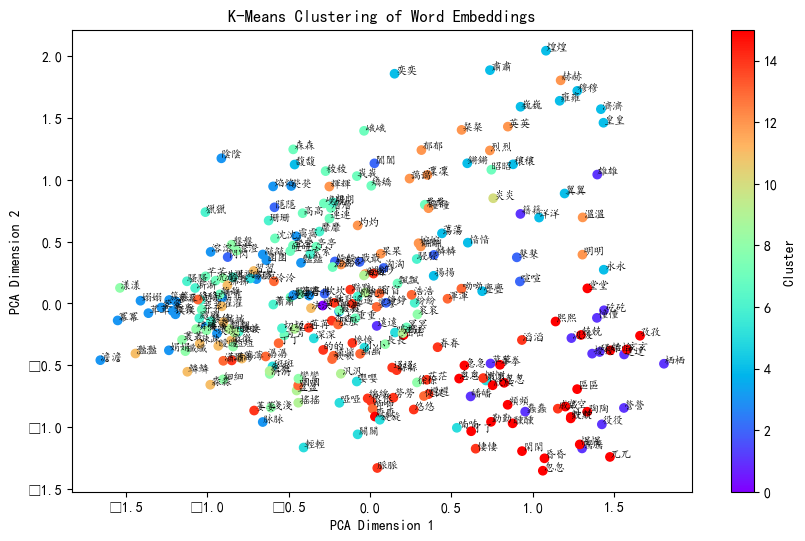

In [48]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

# 加载词向量模型
path = 'output/quantangshi_emb.txt'
emb = KeyedVectors.load_word2vec_format(path, binary=False, unicode_errors='ignore')

# 选择要聚类的词向量
selected_words = two_letter_words
# 获取选定词的词向量
selected_vectors = np.array([emb[word] for word in selected_words])

# 使用 K-Means 进行聚类
n_clusters = 16
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(selected_vectors)

# 降维可视化
pca = PCA(n_components=2)
pca_result = pca.fit_transform(selected_vectors)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='rainbow')

# 显示每个点的标签
for i, word in enumerate(selected_words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]),fontsize=8)

plt.title('K-Means Clustering of Word Embeddings')
plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.colorbar(label='Cluster')
plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

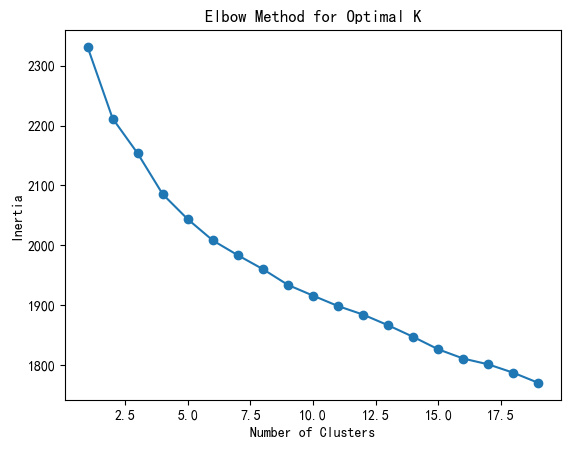

In [30]:
#尋找最佳聚類數
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载词向量模型
path = 'output/quantangshi_emb.txt'
emb = KeyedVectors.load_word2vec_format(path, binary=False, unicode_errors='ignore')

# 选择要聚类的词向量
selected_words = two_letter_words
# 获取选定词的词向量
selected_vectors = np.array([emb[word] for word in selected_words])
data = selected_vectors
# 计算不同聚类数量下的总误差（损失函数值）
inertia_values = []
for k in range(1, 20):  # 尝试不同的聚类数量
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# 绘制肘部曲线图
plt.plot(range(1, 20), inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_in

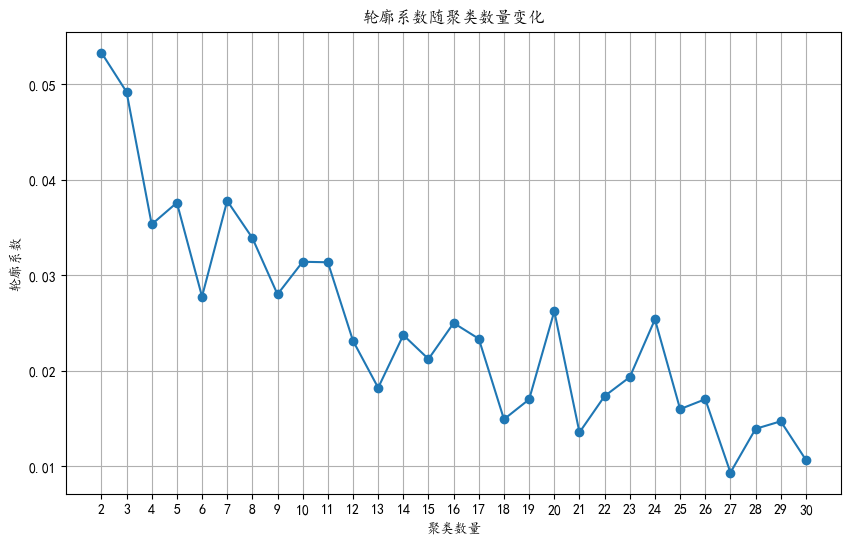

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 要尝试的聚类数量范围
min_clusters = 2
max_clusters = 30

data = selected_vectors  # 你的词向量数据

silhouette_scores = []  # 存储每个聚类数量对应的轮廓系数

for n_clusters in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)  # 计算轮廓系数
    silhouette_scores.append(silhouette_avg)

# 绘制折线图
plt.figure(figsize=(10, 6))
plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
plt.xlabel('聚类数量')
plt.ylabel('轮廓系数')
plt.title('轮廓系数随聚类数量变化')
plt.xticks(range(min_clusters, max_clusters + 1))
plt.grid(True)
plt.show()


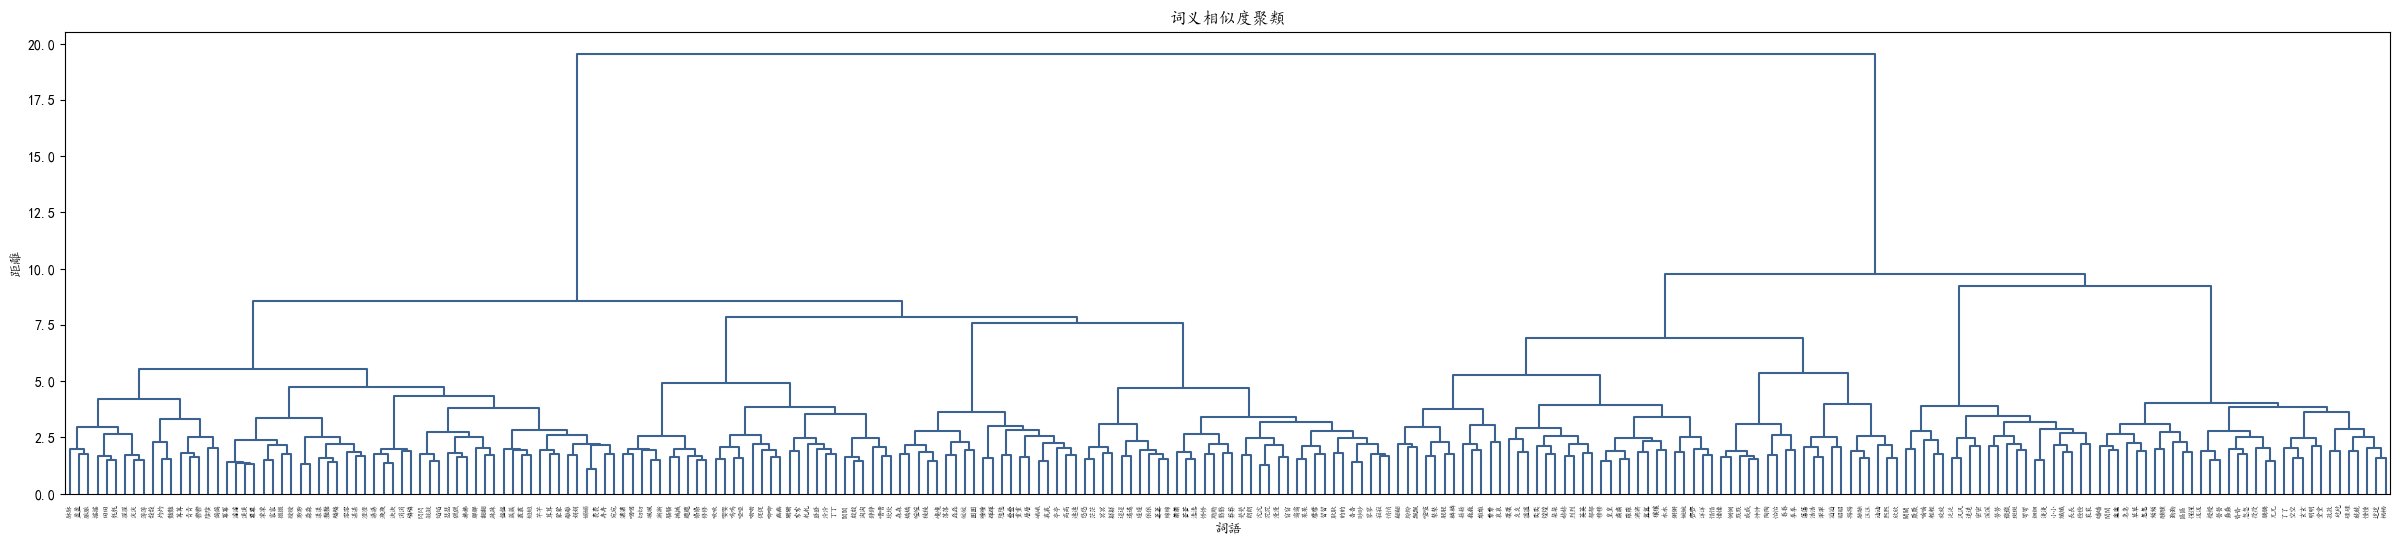

9	悠悠 茫茫 依依 迢迢 冥冥 遲遲 萋萋 遙遙 綿綿 緜緜
10	蒼蒼 蕭蕭 寂寂 沈沈 漫漫 杳杳 淒淒 寥寥 耿耿 悄悄 的的 靄靄 熒熒 靡靡 慘慘 黯黯 眇眇 沉沉 習習 朗朗 翳翳 莽莽 窅窅 杲杲
11	紛紛 翩翩 飄飄 喧喧 纍纍 巍巍 哀哀 駸駸 鼕鼕 籍籍 雄雄 轔轔
2	青青 鬱鬱 陰陰 藹藹 灼灼 苒苒 豔豔 馥馥
3	漠漠 濛濛 霏霏 微微 渺渺 溶溶 澹澹 淼淼 漾漾 灩灩 湛湛 澄澄 冪冪 鱗鱗 曖曖 羃羃
8	重重 亭亭 高高 皎皎 森森 峨峨 團團 隱隱 落落 層層 曈曈 連連 輝輝 稜稜 皚皚 巉巉 疊疊 矯矯 磊磊 峩峩
7	泠泠 歷歷 啾啾 珊珊 丁丁 軋軋 唧唧 嗚嗚 幽幽 促促 索索 啞啞 嘈嘈 殷殷 洶洶 呦呦 闐闐 錚錚 嚶嚶 坎坎
14	浩浩 滔滔 昭昭 熙熙 蕩蕩 欣欣 融融 油油 渾渾 揚揚 汪汪
17	擾擾 騰騰 明明 營營 昏昏 兀兀 堂堂 忽忽 了了 空空 孜孜 碌碌 汲汲 役役 憧憧 蠢蠢 矻矻 兢兢 遑遑 栖栖 玄玄
12	肅肅 煌煌 赫赫 穆穆 濟濟 鏘鏘 皇皇 洋洋 凜凜 愔愔 穰穰 炎炎 奕奕 烈烈 英英 永永 粲粲 亹亹 郁郁 溫溫 雍雍 翼翼 婉婉
5	冉冉 嫋嫋 離離 褭褭 瑟瑟 娟娟 芊芊 獵獵 簇簇 翻翻 宛宛 拂拂 叢叢 茸茸 閃閃 燄燄 聯聯 蒙蒙 盤盤 疎疎 短短 焰焰
4	潺潺 涓涓 磷磷 濺濺 決決
6	颯颯 切切 颼颼 淅淅 瀟瀟 翛翛 修修 騷騷 咽咽 摵摵
15	纖纖 小小 輕輕 斑斑 泛泛 關關 深深 徐徐 細細 遠遠 勞勞 衮衮 厭厭 密密 旋旋 彎彎 喃喃 長長 淺淺 汎汎 戢戢
16	草草 區區 頻頻 醺醺 怱怱 閑閑 皤皤 勤勤 惺惺 急急 悤悤
1	盈盈 脈脈 脉脉 搖搖 田田 淡淡 毿毿 薄薄 濯濯
13	默默 戚戚 悽悽 惻惻 陶陶 怡怡 忡忡 眷眷 拳拳


In [52]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 示例数据：特定虚词的使用情况
data = np.array(similarity_matrix)

# 自定义边的颜色函数
def my_link_color_func(*args):
    c = '#3b6291'  # 默认边的颜色为蓝色
    if args[0] > 2:
        c = '#3b6291'  # 如果距离大于阈值，设置边的颜色为绿色
    return c

# 使用层次聚类算法进行聚类
Z = linkage(data, method='ward')  # 使用ward方法计算距离

# 设置画布尺寸
plt.figure(figsize=(30, 6))  # 设置宽度更大，高度适中

# 绘制树状图，显示文本标签
dendrogram(Z, labels=two_letter_words, link_color_func=my_link_color_func)

# 设置图表参数
plt.xlabel('詞語')
plt.ylabel('距離')
plt.title('词义相似度聚類')

# 显示图表
plt.show()

# 输出每一类包含的词语
from scipy.cluster.hierarchy import fcluster

# 设定阈值
threshold = 4

# 根据阈值划分类别
clusters = fcluster(Z, threshold, criterion='distance')

# 将词语与类别对应起来
word_clusters = {}
for word, cluster in zip(two_letter_words, clusters):
    if cluster not in word_clusters:
        word_clusters[cluster] = []
    word_clusters[cluster].append(word)

# 输出每一类包含的词语
for cluster, words in word_clusters.items():
    words = " ".join(words)
    print(f"{cluster}\t{words}")
